In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk import ngrams
from collections import Counter
import warnings
'''to clear the warning message'''
from sklearn.exceptions import ConvergenceWarning
# Filter the warning message
warnings.filterwarnings("ignore", category=FutureWarning)
# Disable convergence warning messages
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Disable Deprecatio warning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
dataset=pd.read_csv("/content/NEWS (1).CSV.zip")

In [ ]:
#Shape of the dataset
print("Number of rows:", dataset.shape[0])
print("Number of columns:", dataset.shape[1])

Number of rows: 6335
Number of columns: 5


In [ ]:
# Display the column names and their data types
print("\nColumn names and data types:")
print(dataset.dtypes)


Column names and data types:
Unnamed: 0.1     int64
Unnamed: 0       int64
title           object
text            object
label           object
dtype: object


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  6335 non-null   int64 
 1   Unnamed: 0    6335 non-null   int64 
 2   title         6335 non-null   object
 3   text          6335 non-null   object
 4   label         6335 non-null   object
dtypes: int64(2), object(3)
memory usage: 247.6+ KB


In [ ]:
# Display the summary statistics
print("\nSummary statistics:")
print(dataset.describe())


Summary statistics:
       Unnamed: 0.1    Unnamed: 0
count    6335.00000   6335.000000
mean     3167.00000   5280.415627
std      1828.90131   3038.503953
min         0.00000      2.000000
25%      1583.50000   2674.500000
50%      3167.00000   5271.000000
75%      4750.50000   7901.000000
max      6334.00000  10557.000000


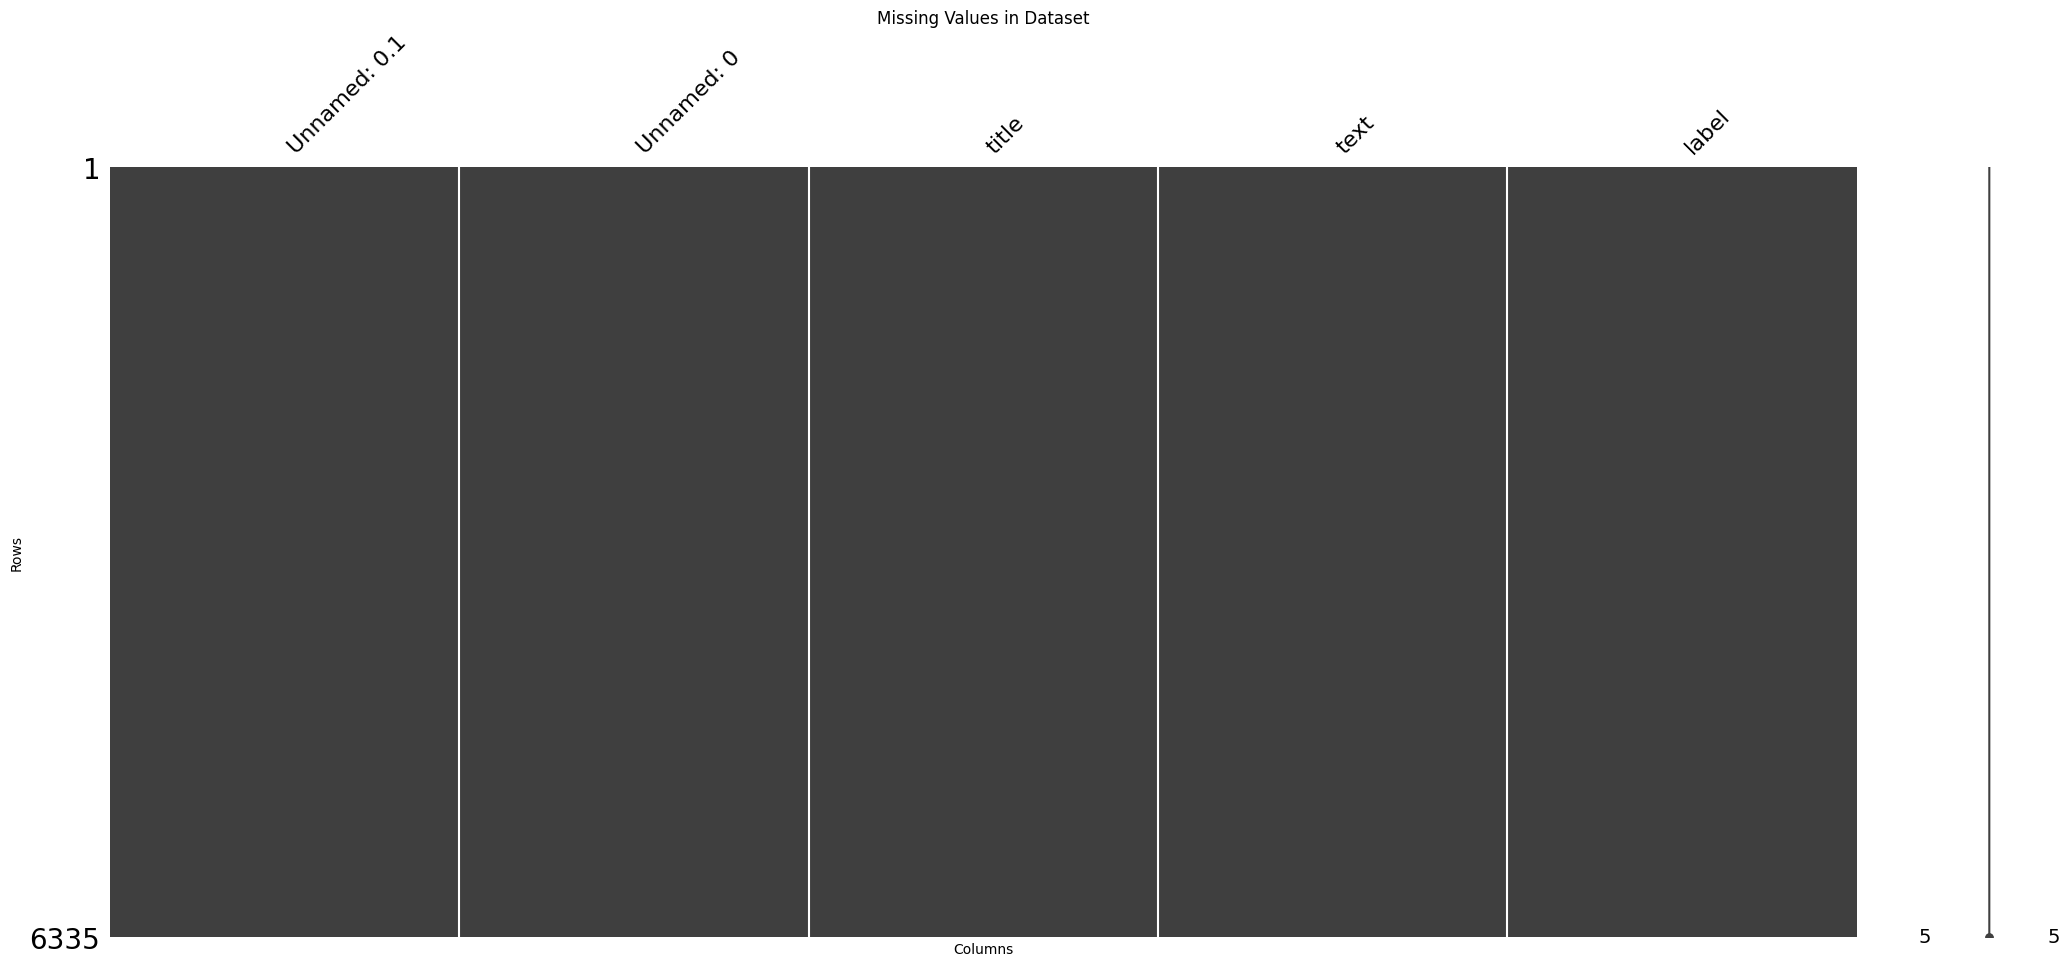

In [ ]:
import missingno as msno   # For visualizing missing values
# Plot the missing values for each column
msno.matrix(dataset)

# Add title and labels to the plot
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()

In [ ]:
# Identify duplicate rows
duplicates = dataset[dataset.duplicated(keep=False)] #duplicated is a pandas library to check for duplicated rows in pandas dataframe
'''Here we used keep=Flase so that the first occurrence of a duplicate row is marked as "not a duplicate",
while subsequent occurrences are marked as "duplicate" and removed from the resulting DataFrame.'''

# Print the duplicate rows
if len(duplicates) > 0:
    print('Duplicate Rows:')
    print(duplicates)
else:
    print('No duplicates found.')

print("Total Duplicate Entries: ", len(duplicates))

No duplicates found.
Total Duplicate Entries:  0


In [ ]:
dataset=dataset[['title','text','label']]
dataset.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Calculate the value counts of the "label" column
counts=dataset["label"].value_counts()
print(counts)

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


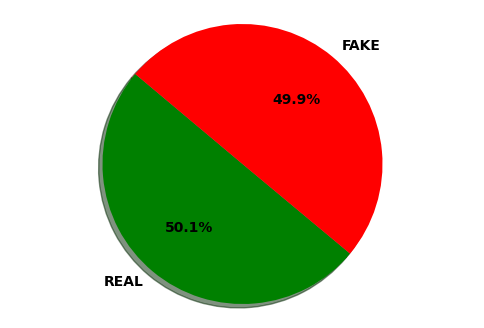

In [ ]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the size as needed

# Create a pie chart with custom colors and shadow
colors = ['green', 'red']  # Red for Fake, Blue for Real
explode = (0.1, 0)  # Explode the 1st slice (Fake)
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
                                  startangle=140, colors=colors,  shadow=True)

# Customize the text appearance on the slices
for text in texts + autotexts:
    text.set_fontsize(10)  # Adjust font size
    text.set_fontweight('bold')  # Set text weight

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

# Add a title
#plt.title('Distribution of News Label', fontsize=12)

# Save the plot to a file (optional)
plt.savefig('pie_chart.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

# Display the plot
plt.show()

In [ ]:
# Calculate the length of each article
dataset['article_length'] = dataset['text'].apply(lambda x: len(x.split()))

# Create a histogram using Plotly Express
fig = px.histogram(dataset, x='article_length', color='label', nbins=50)

# Update the layout to make the plot smaller
fig.update_layout(width=600, height=400)

# Show the plot
fig.show()

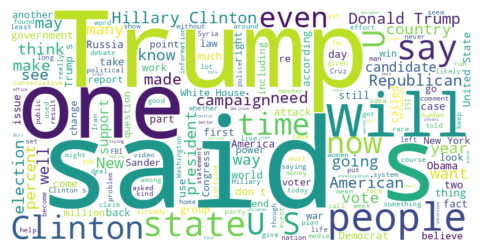

In [ ]:
# Concatenate the text from 'title' and 'text' columns
text = ' '.join(dataset['title'].tolist() + dataset['text'].tolist())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Group the data by label and count the number of words in each article
dataset['word_count'] = dataset['text'].apply(lambda x: len(x.split()))
mean_word_count = dataset.groupby('label')['word_count'].mean().reset_index()

# Plot the average word count by label
fig = px.bar(mean_word_count, x='label', y='word_count', color='label',
             title='Average Word Count by Label')
fig.show()

In [ ]:
dataset_real=dataset[dataset['label']=="REAL"].copy() #taking only the REAL news
dataset_real["title_text"]=dataset_real['title']+ ' ' +dataset_real["text"] #combining text and title
dataset_real

,title,text,label,article_length,word_count,title_text
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,431,431,Kerry to go to Paris in gesture of sympathy U....
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,317,317,The Battle of New York: Why This Primary Matte...
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,123,123,‘Britain’s Schindler’ Dies at 106 A Czech stoc...
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,2354,2354,Fact check: Trump and Clinton at the 'commande...
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,710,710,Iran reportedly makes new push for uranium con...
...,...,...,...,...,...,...
6324,Alabama Lawmaker: Same-Sex Couples Don’t Deser...,Most conservatives who oppose marriage equalit...,REAL,288,288,Alabama Lawmaker: Same-Sex Couples Don’t Deser...
6327,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL,370,370,GOP Senator David Perdue Jokes About Praying f...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,642,642,State Department says it can't find emails fro...
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,1120,1120,"In Ethiopia, Obama seeks progress on peace, se..."


In [ ]:
#!pip install nltk
#import nltk

#nltk.download('wordnet')
import nltk
import subprocess
nltk.download('stopwords') #to import necessary stopwords
# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet #to import english words that provides information about their meanings, relationships, and usage

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /kaggle/working/...


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove('not') #removing not from the stop words
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowercase text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    text = re.sub(r'\W', ' ', text) # Remove all the special characters
    text = re.sub(r'\d+', '', text) # remove numerical values
    text = re.sub(r'<.*?>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # remove all single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # Remove single characters from the start
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Substituting multiple spaces with single space
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split()) # perform lemmatization to get the root of english words
    return text

In [ ]:
dataset_real['title_text']=dataset_real['title_text'].apply(clean_text)
print(dataset_real['title_text'])

2       kerry go paris gesture sympathy s secretary st...
4       battle new york primary matter primary day new...
7       britain schindler dy czech stockbroker saved j...
8       fact check trump clinton commander in chief fo...
9       iran reportedly make new push uranium concessi...
                              ...                        
6324    alabama lawmaker same sex couple don deserve f...
6327    gop senator david perdue joke praying obama de...
6330    state department say can find email clinton sp...
6333    ethiopia obama seek progress peace security ea...
6334    jeb bush suddenly attacking trump here matter ...
Name: title_text, Length: 3171, dtype: object


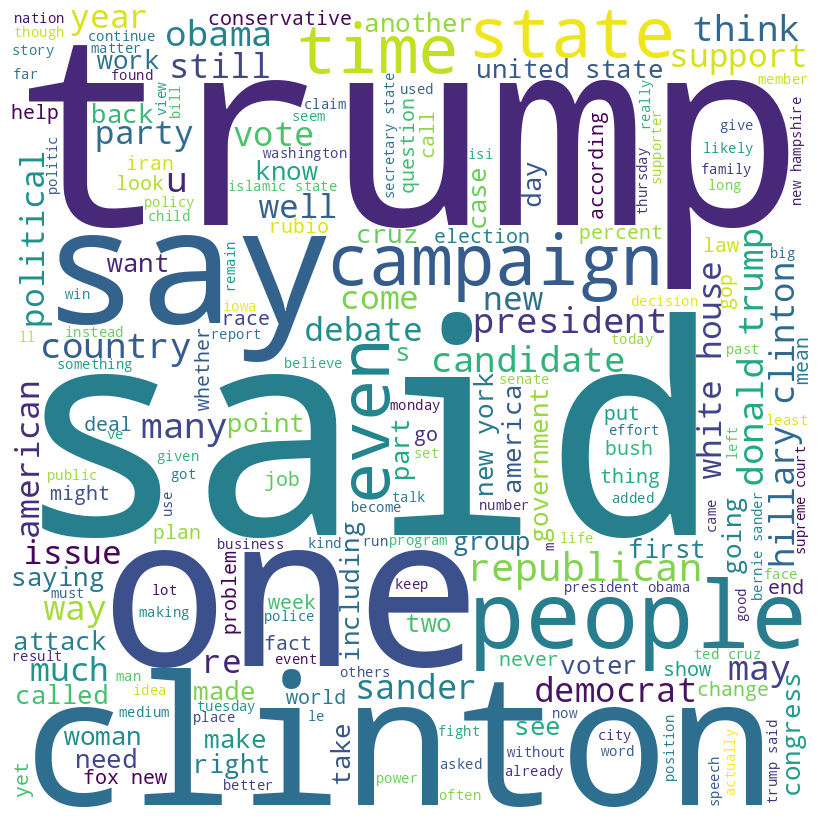

In [ ]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews = ' '.join(dataset_real['title_text'])
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews)
# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import nltk
# Download the 'punkt' resource
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#... rest of the code (unchanged) ...
from collections import Counter #to count the occurance of each word
from nltk.tokenize import word_tokenize #to perform tokenization
# Tokenize the text data
tokens = word_tokenize(' '.join(dataset_real["title_text"])) # here all news are concatenated using join to get a single paragraph

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(tokens)

# Convert the word counts to a DataFrame and sort by frequency
word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df.sort_values('count', ascending=False, inplace=True)

# Select the top 30 most frequent words
top_words_df = word_counts_df.head(30)

# Create a bar plot of the 30 most frequent words using Plotly
fig = go.Figure(data=[go.Bar(x=top_words_df.index, y=top_words_df['count'])])
fig.update_layout(title='Top 30 Most Frequent Words in Real News', xaxis_title='Words', yaxis_title='Frequency')
fig.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Tokenize the text data
tokens = [word_tokenize(text.lower()) for text in dataset_real["title_text"]] #here each document is tokenized seperately

# Count co-occurring words within a window size of 3
co_occurrence = Counter()
for text in tokens:
    for i, word1 in enumerate(text):
        for j in range(max(0, i-3), i):
            if j < len(text) and text[j] != word1 and text[j] not in stop_words:
                for k in range(max(0, j-3), j):
                    if k < len(text) and text[k] != word1 and text[k] != text[j] and text[k] not in stop_words:
                        words = (word1, text[j], text[k])
                        co_occurrence[words] += 1

# Create a pandas DataFrame of co-occurring words with frequency count
co_occurrence_df = pd.DataFrame(list(co_occurrence.items()), columns=['words', 'count']) #dataframe to store pairs of word and count
co_occurrence_df = co_occurrence_df.sort_values(by='count', ascending=False) #sorting based on count

In [ ]:
# Display the top 10 most frequent co-occurring word combinations
print(co_occurrence_df.head(50).to_string(index=False)) #setting index to false

                                words  count
                    (time, york, new)    368
           (obama, barack, president)    349
                     (cruz, ted, sen)    279
           (state, secretary, former)    239
                  (rubio, marco, sen)    222
(candidate, presidential, republican)    195
          (trump, donald, republican)    190
                    (news, fox, told)    186
          (report, press, associated)    184
           (state, united, president)    180
       (clinton, hillary, democratic)    180
                (sander, bernie, sen)    178
            (bush, george, president)    174
               (hampshire, new, iowa)    170
         (report, contributed, press)    166
     (contributed, press, associated)    166
    (report, contributed, associated)    165
              (act, care, affordable)    165
                    (city, york, new)    156
                 (kasich, john, ohio)    156
           (leader, majority, senate)    154
          

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer #importing the library
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to classify the sentiment of a review
def classify_sentiment(review):
    # Use the sentiment analyzer to get the sentiment scores
    sentiment_scores = sia.polarity_scores(review)

    # Determine the overall sentiment label based on the sentiment score
    if sentiment_scores['compound'] >0:
        return 'Positive'
    elif sentiment_scores['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'
sia = SentimentIntensityAnalyzer()

# Define a function to calculate the compound score of a review
def get_compound_score(review):
    sentiment_scores = sia.polarity_scores(review)
    return sentiment_scores['compound']

# Apply the sentiment classifier to each review and create a new column
dataset_real['Sentiment'] = dataset_real['title_text'].apply(classify_sentiment)
dataset_real['compound_score'] = dataset_real['title_text'].apply(get_compound_score)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_real['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_real['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_real['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_real.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
# Update the layout to make the plot smaller
fig.update_layout(width=400, height=400)
#fig.update_layout(title='Distribution of Sentiment of REAL NEWS')
fig.show()

In [ ]:
dataset_fake=dataset[dataset['label']=="FAKE"].copy() #taking only the FAKE news
dataset_fake["title_text"]=dataset_fake['title']+ ' ' + dataset_fake["text"] #combining text and title
dataset_fake

,title,text,label,article_length,word_count,title_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296,1296,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446,446,Watch The Exact Moment Paul Ryan Committed Pol...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404,404,Bernie supporters on Twitter erupt in anger ag...
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,2346,2346,"Tehran, USA \nI’m not an immigrant, but my g..."
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,553,553,Girl Horrified At What She Watches Boyfriend D...
...,...,...,...,...,...,...
6326,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE,489,489,DOJ COMPLAINT: Comey Under Fire Over Partisan ...
6328,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE,0,0,Radio Derb Is On The Air–Leonardo And Brazil’s...
6329,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE,418,418,Assange claims ‘crazed’ Clinton campaign tried...
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,2183,2183,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...


In [ ]:
dataset_fake['title_text']=dataset_fake['title_text'].apply(clean_text)

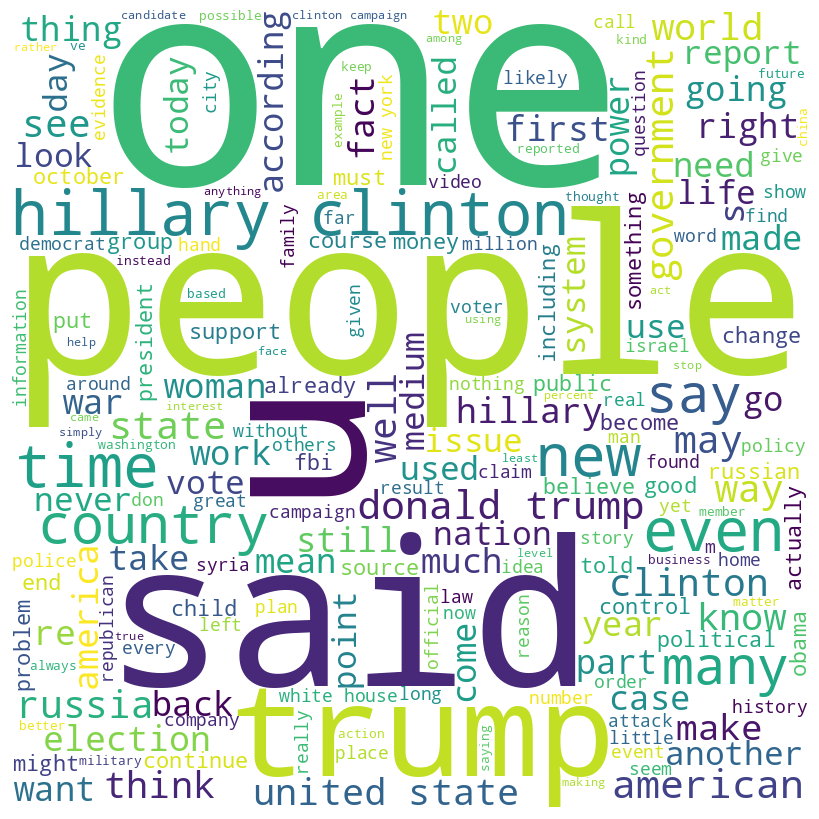

In [ ]:
from wordcloud import WordCloud
# Join all reviews into a single string
all_reviews_fake = ' '.join(dataset_fake['title_text'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(all_reviews_fake)

# Display the word cloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from collections import Counter #to count the occurance of each word
from nltk.tokenize import word_tokenize #to perform tokenization
# Tokenize the text data
tokens_fake = word_tokenize(' '.join(dataset_fake["title_text"])) # here all news are concatenated using join to get a single paragraph


tokens_fake = [word for word in tokens_fake if len(word) > 2] #elimating the words having length less than 2

# Count the frequency of each word
word_counts = Counter(tokens_fake)

# Convert the word counts to a DataFrame and sort by frequency
word_counts_df_fake = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df_fake.sort_values('count', ascending=False, inplace=True)

# Create a bar plot of the 30 most frequent words using Plotly
fig = go.Figure(data=[go.Bar(x=word_counts_df_fake.index[:30], y=word_counts_df_fake['count'][:30])])
fig.update_layout(
    title='Top 30 Most Frequent Words in Fake News',
    xaxis=dict(title='Words'),
    yaxis=dict(title='Frequency')
)
fig.show()

In [ ]:
# Tokenize the text data
tokens_fake = [word_tokenize(text.lower()) for text in dataset_fake["title_text"]] #here each document is tokenized seperately

# Count co-occurring words within a window size of 3
co_occurrence = Counter()
for text in tokens_fake:
    for i, word1 in enumerate(text):
        for j in range(max(0, i-3), i):
            if j < len(text) and text[j] != word1 and text[j] not in stop_words:
                for k in range(max(0, j-3), j):
                    if k < len(text) and text[k] != word1 and text[k] != text[j] and text[k] not in stop_words:
                        words = (word1, text[j], text[k])
                        co_occurrence[words] += 1

# Create a pandas DataFrame of co-occurring words with frequency count
co_occurrence_df_fake = pd.DataFrame(list(co_occurrence.items()), columns=['words', 'count']) #dataframe to store pairs of word and count
co_occurrence_df_fake = co_occurrence_df_fake.sort_values(by='count', ascending=False) #sorting based on count

In [ ]:
# Display the top 10 most frequent co-occurring word combinations
print(co_occurrence_df_fake.head(50).to_string(index=False)) #setting index to false

                                words  count
                    (time, york, new)    265
                  (com, twitter, pic)    206
                     (com, www, http)    199
               (comey, director, fbi)    197
            (email, clinton, hillary)    187
             (comey, james, director)    170
                  (comey, james, fbi)    162
               (james, director, fbi)    160
          (force, brain, utm_content)    154
         (campaign, clinton, hillary)    143
           (state, united, president)    133
            (clinton, hillary, trump)    126
          (trump, donald, republican)    122
           (force, brain, utm_medium)    119
         (brain, utm_content, widget)    119
               (force, brain, widget)    119
     (brain, utm_content, utm_medium)    119
            (brain, utm_content, com)    119
           (pipeline, access, dakota)    111
        (clinton, investigation, fbi)    108
             (hillary, trump, donald)    105
          

In [ ]:
# Apply the sentiment classifier to each review and create a new column
dataset_fake['Sentiment'] = dataset_fake['title_text'].apply(classify_sentiment)
dataset_fake['compound_score'] = dataset_fake['title_text'].apply(get_compound_score)

In [ ]:
dataset_fake["Sentiment"].value_counts()

,count
Sentiment,
Positive,1594
Negative,1531
Neutral,39


In [ ]:
'''
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_fake['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_fake['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_fake['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_fake.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news
labels = ['Positive', 'Negative', 'Neutral']
values = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.3, marker=dict(colors=colors))])
#fig.update_layout(title='Distribution of Sentiment of FAKE NEWS')
fig.update_layout(width=400, height=400)
fig.show()
'''
# Calculate the percentage of positive, negative, and neutral news
positive_reviews = (dataset_fake['Sentiment'] =="Positive" ).sum()
negative_reviews = (dataset_fake['Sentiment'] =="Negative" ).sum()
neutral_reviews = (dataset_fake['Sentiment'] =="Neutral" ).sum()
total_reviews = dataset_fake.shape[0]
positive_pct = positive_reviews / total_reviews * 100
negative_pct = negative_reviews / total_reviews * 100
neutral_pct = neutral_reviews / total_reviews * 100

# Create a pie chart of the percentage of positive, negative, and neutral news using Plotly
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_pct, negative_pct, neutral_pct]
colors = ['green', 'red', 'gray']
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, marker=dict(colors=colors))])
# Update the layout to make the plot smaller
fig.update_layout(width=450, height=400)
#fig.update_layout(title='Distribution of Sentiment of REAL NEWS')
fig.show()
